In [1]:
import numpy as np
from collections import defaultdict
import random
from tqdm import trange
import copy
import networkx as nx
import matplotlib.pyplot as plt
import sys
import igraph
from matplotlib import cm, colors
random.seed(42)
import seaborn as sns
from abstract_environments import * #ContinuousTMaze, GridEnvRightDownNoCue, GridEnvRightDownNoSelf, GridEnvDivergingMultipleReward, GridEnvDivergingSingleReward
from util import *
# from util import transition_matrix_action

/Users/aidangoeschel/Documents/UCI/CCNL/CSCG_LCM/testing_environments.py:942: SyntaxWarning: invalid escape sequence '\ '
  """


Simulating experiments described in this paper: [The role of prospective contingency in the control of behavior and dopamine signals during associative learning](https://pmc.ncbi.nlm.nih.gov/articles/PMC10871210/#S30) (Qian et al., 2024 bioRxiv)

our hypothesis:

degradation --> less split in delay. so more stochastic, therefore devaluation of A

cued reward --> delay splits. therefore no devaluation of A


In [2]:
lam=0.8
gamma = 0.1

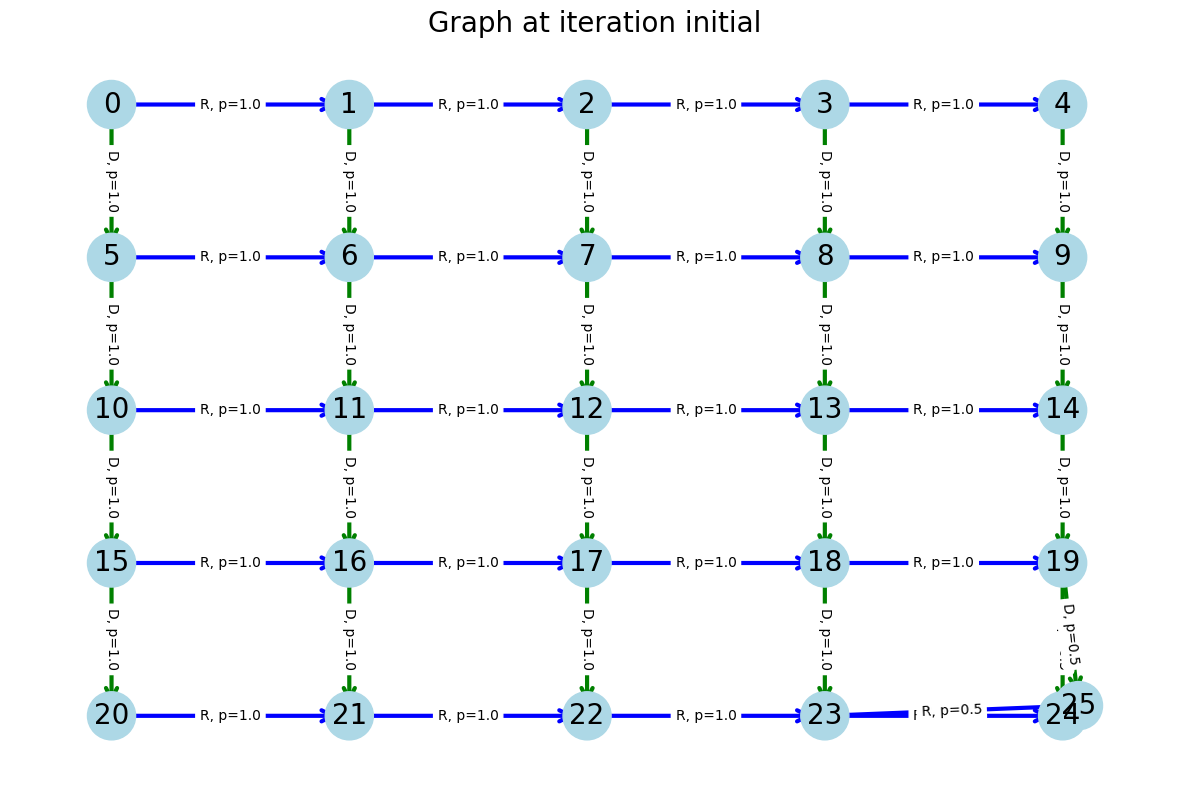

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


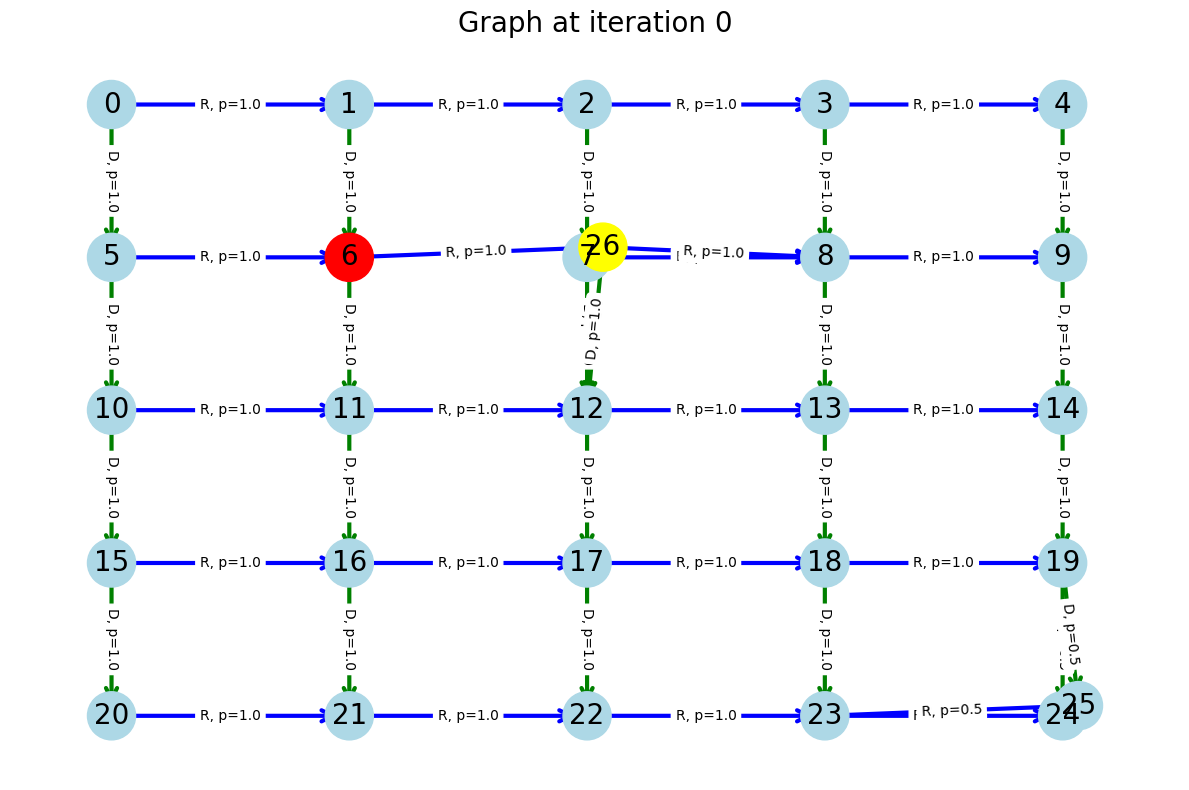

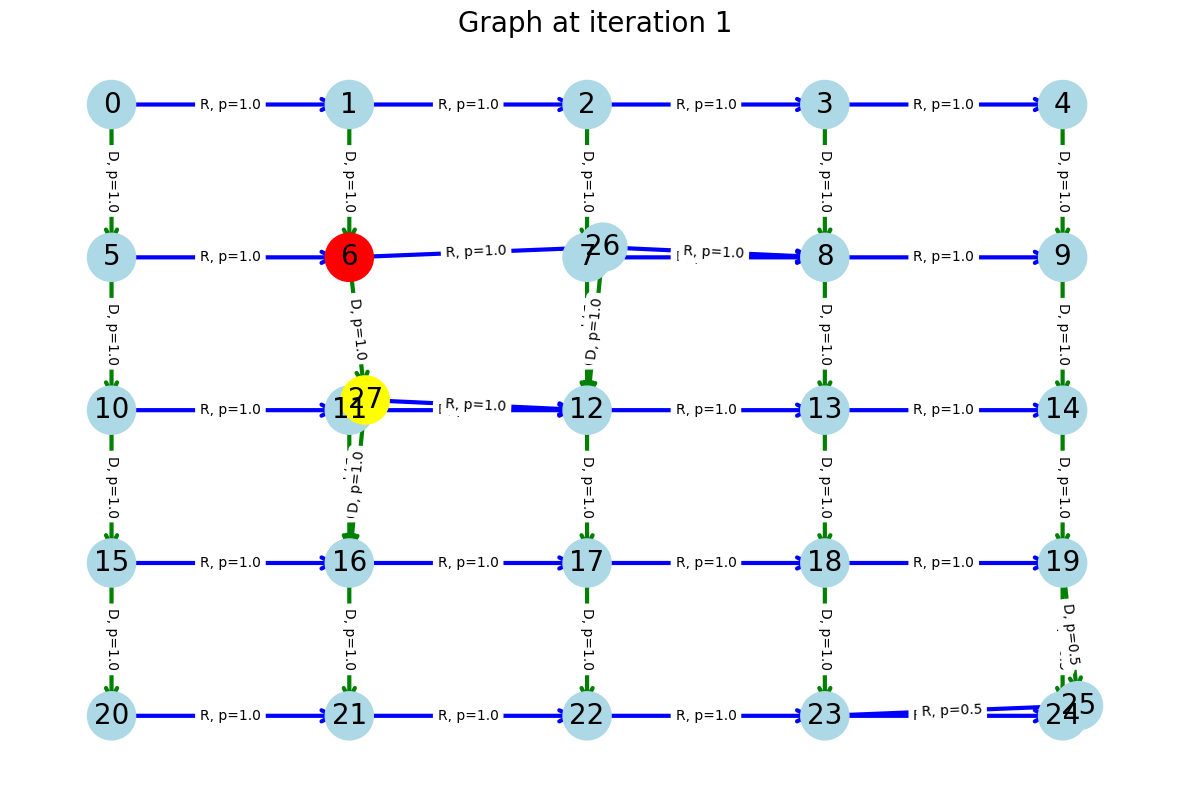



Iteration 1


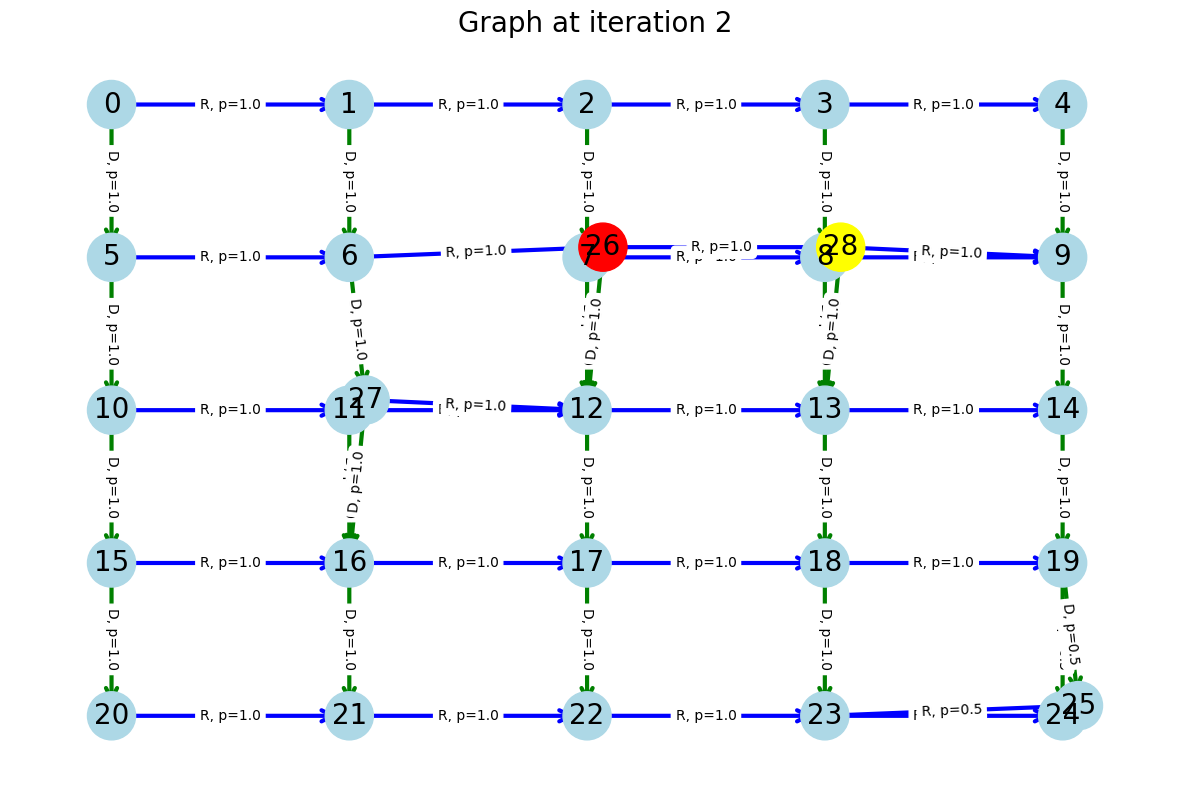

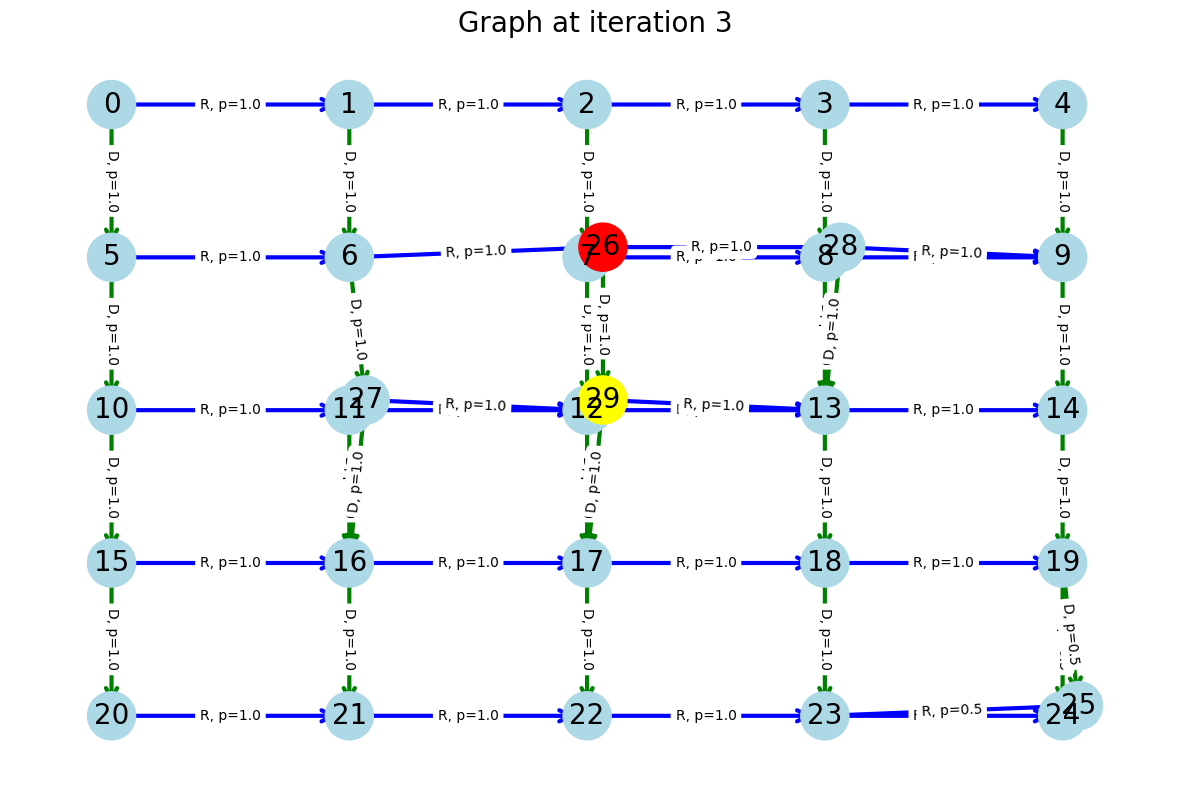



Iteration 2


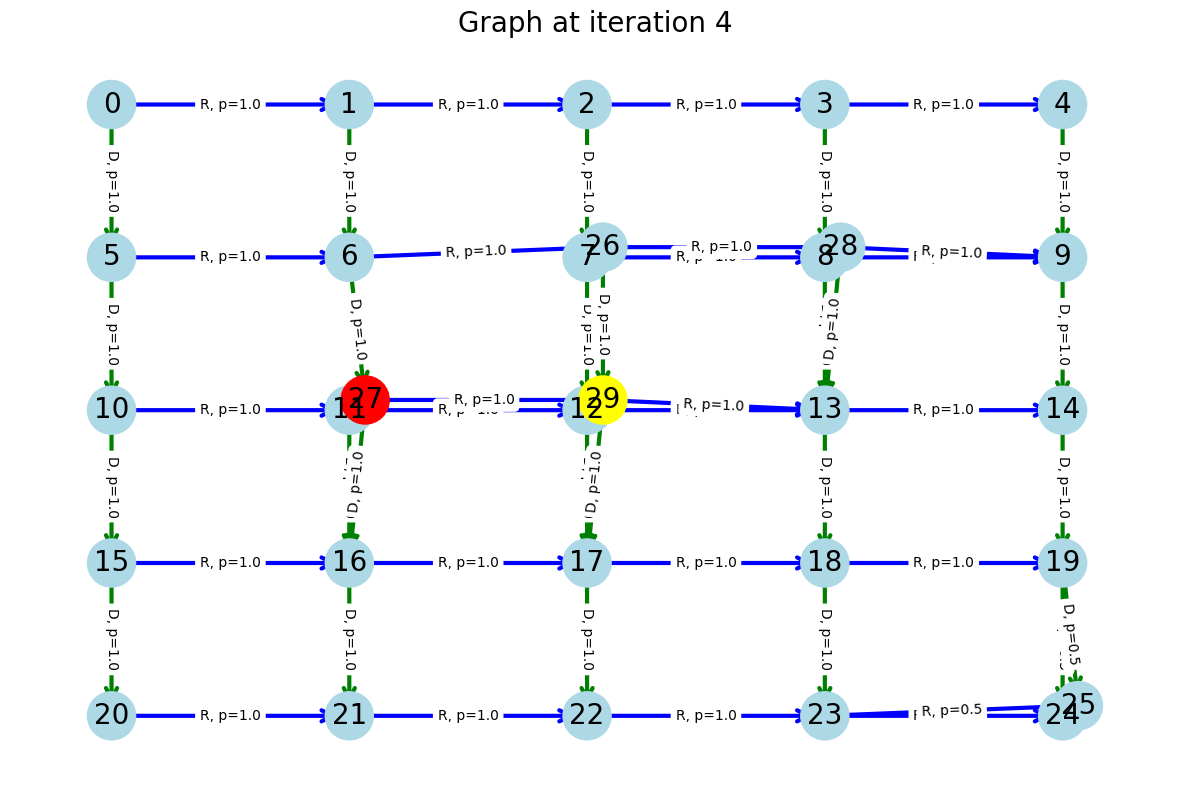

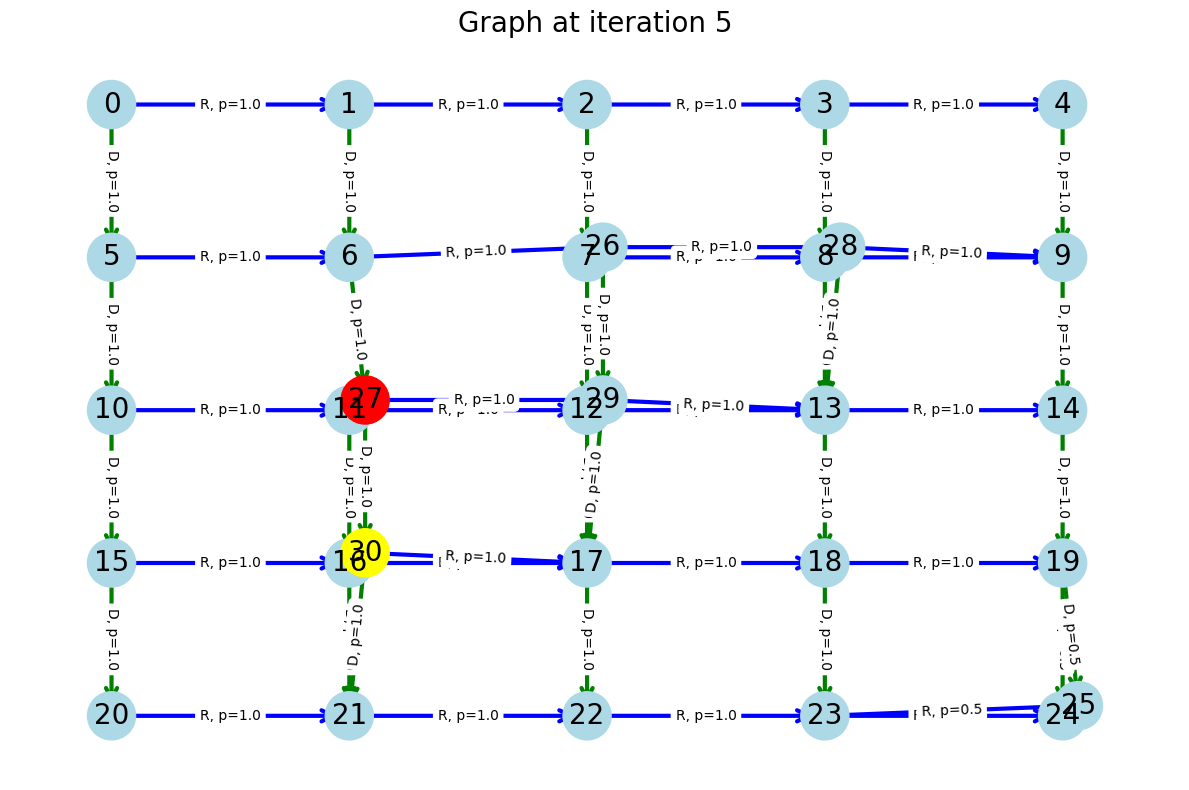



Iteration 3


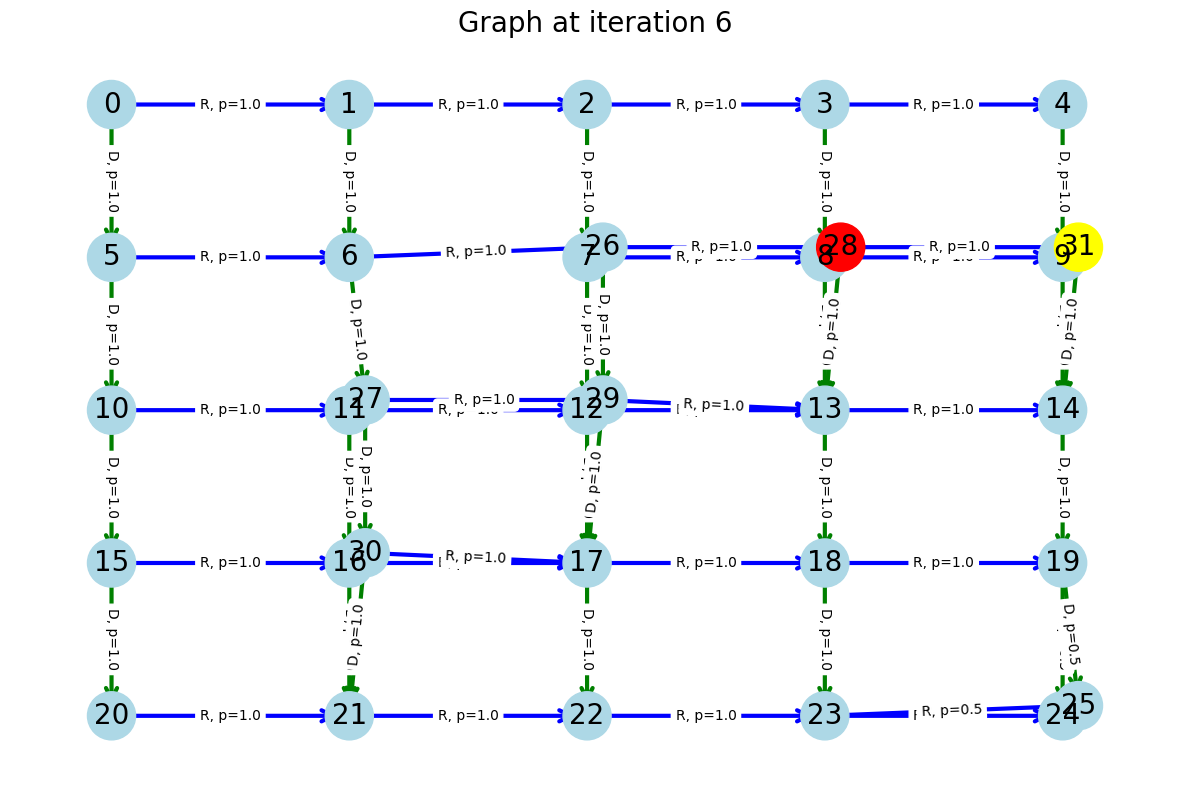

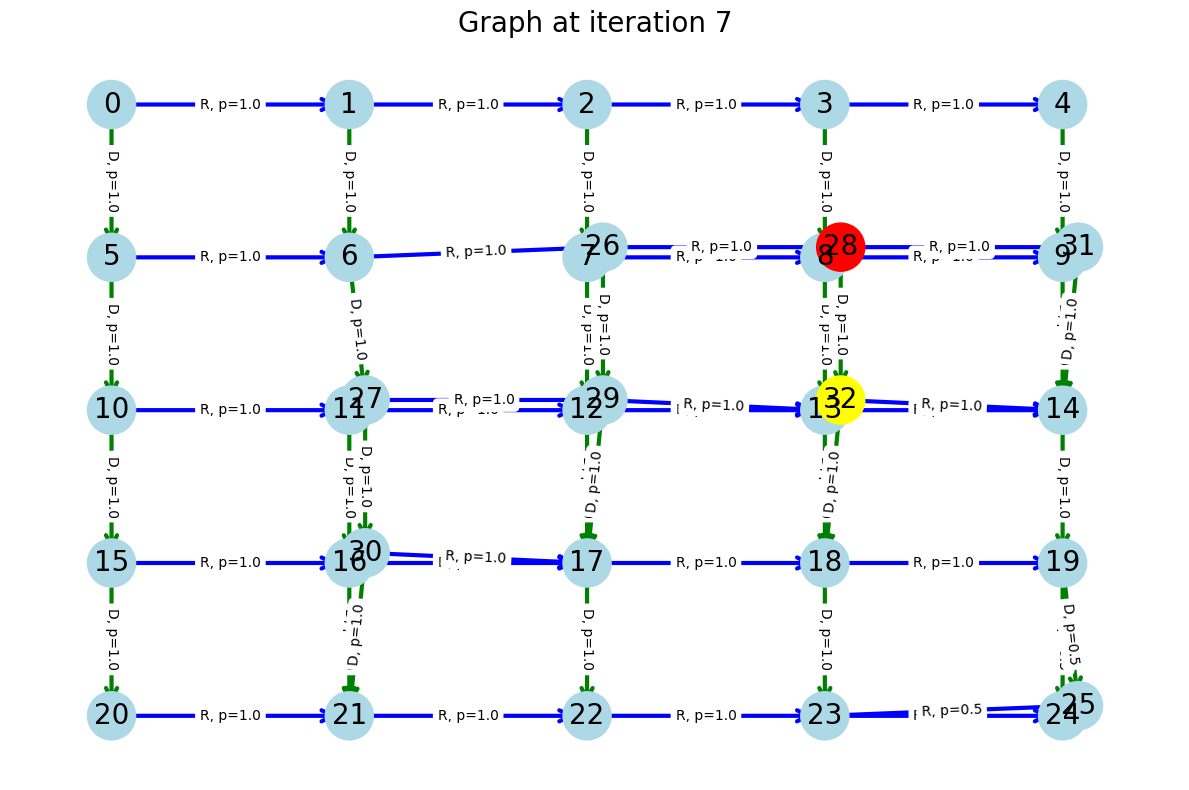



Iteration 4


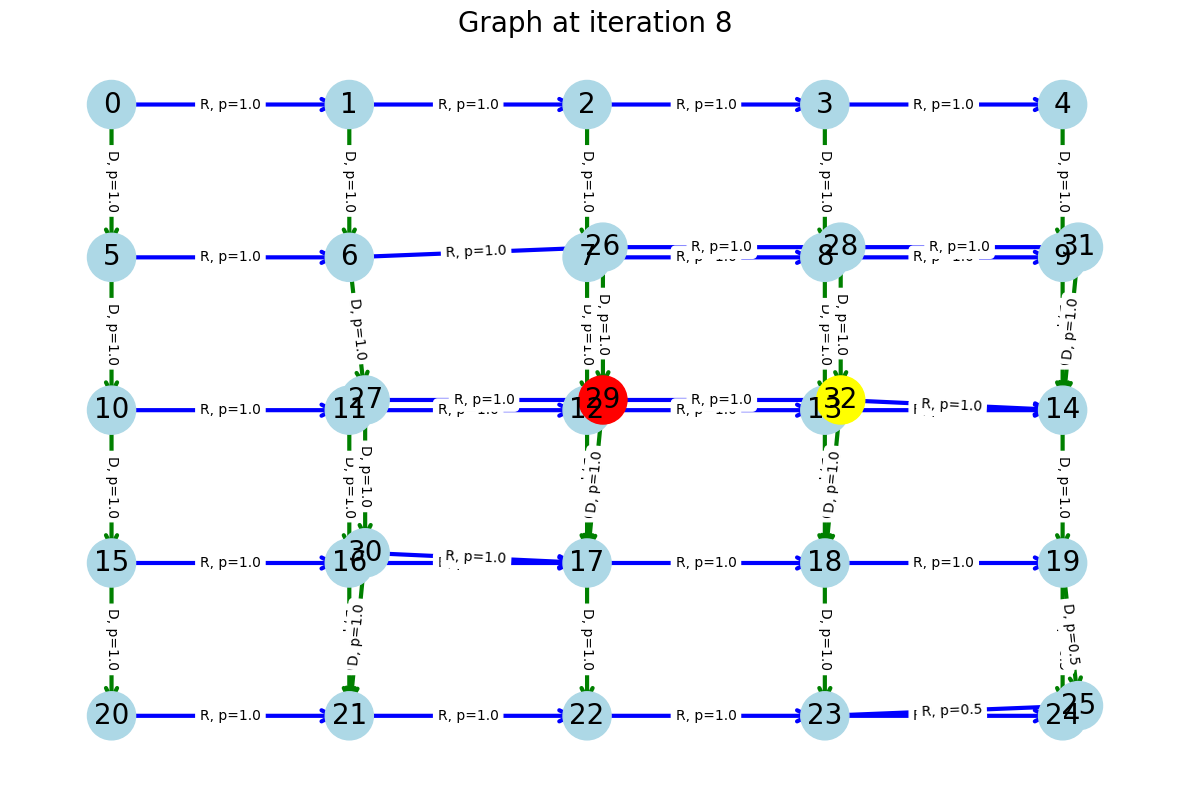

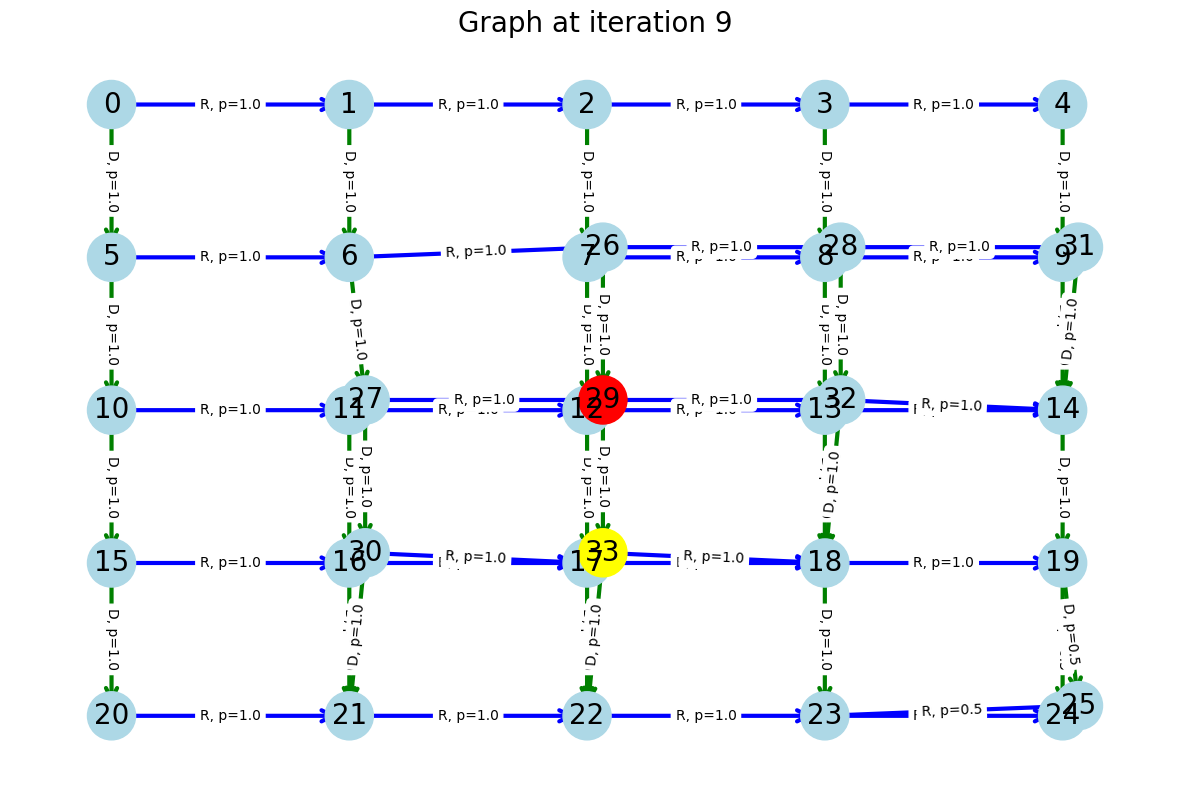



Iteration 5


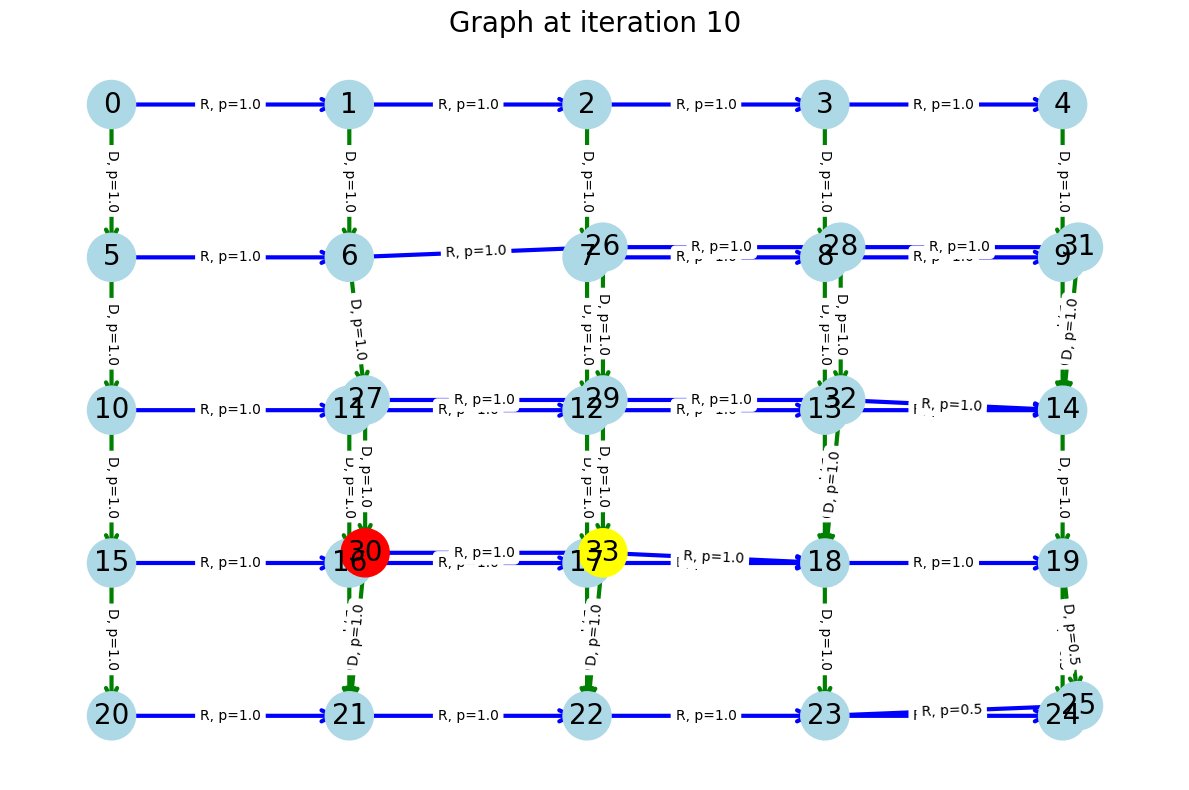

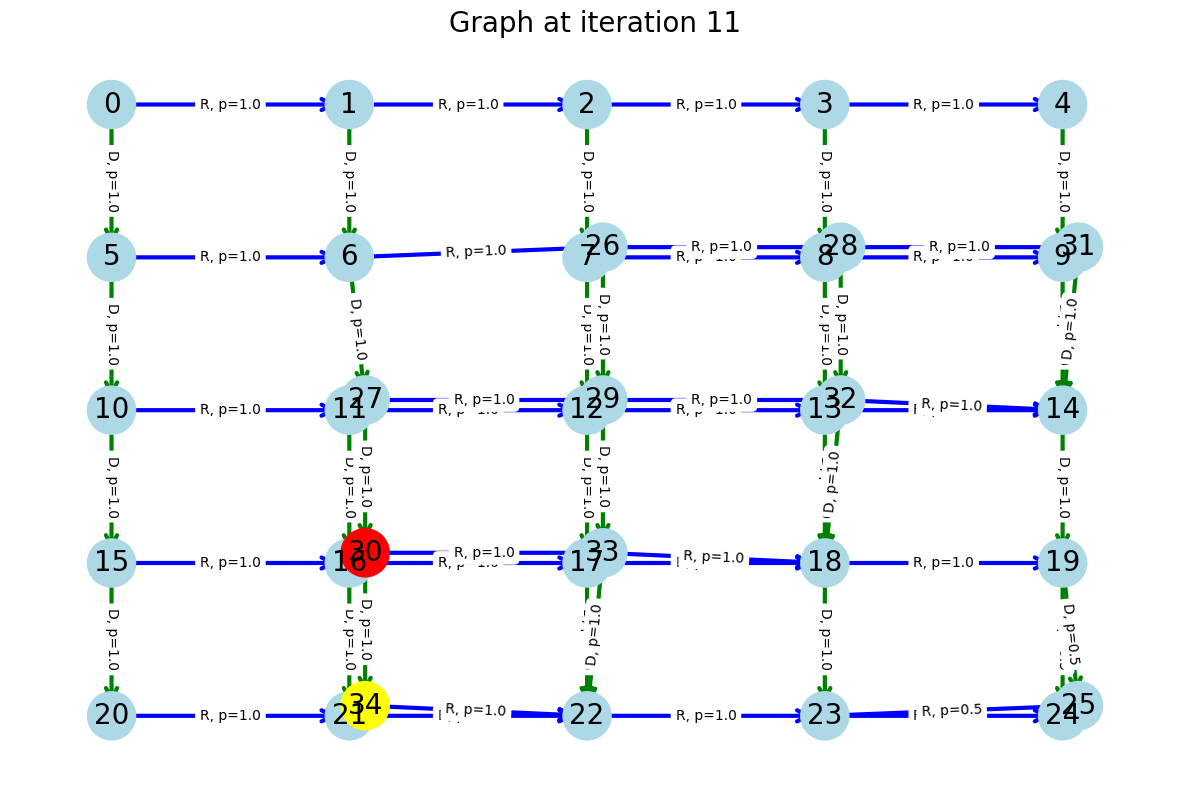



Iteration 6


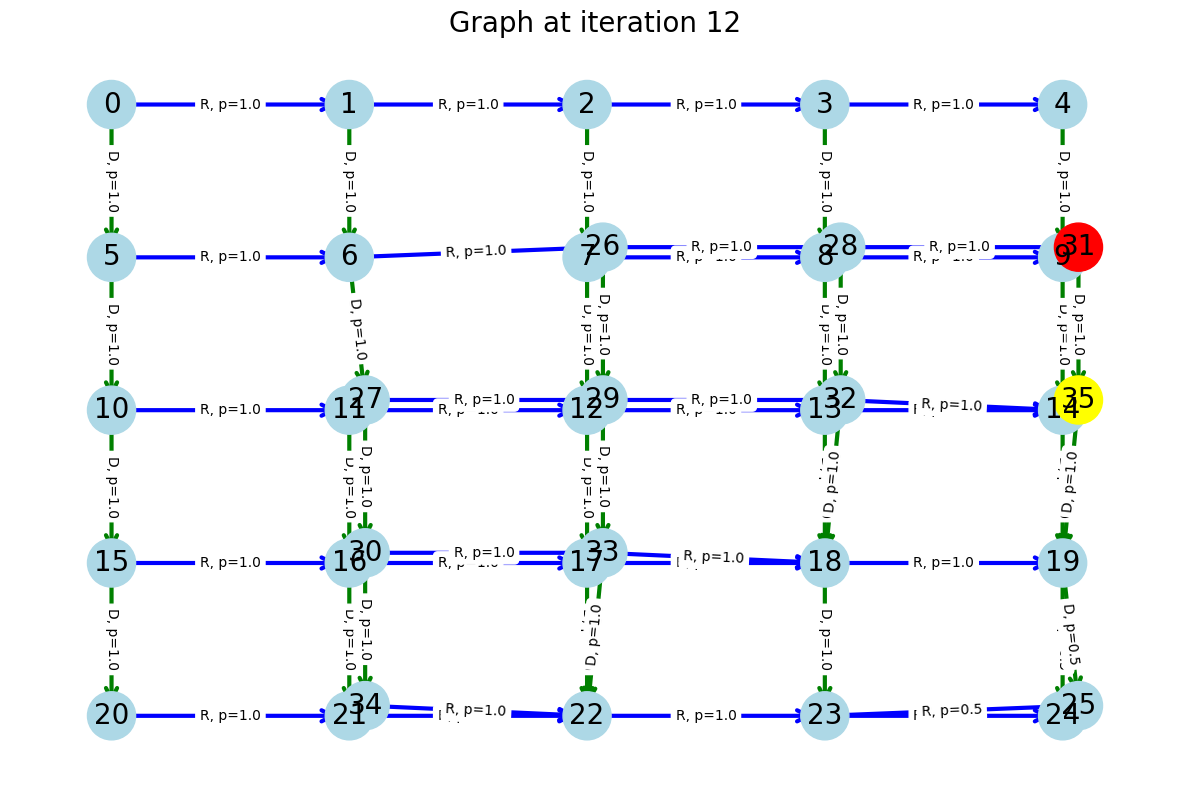



Iteration 7


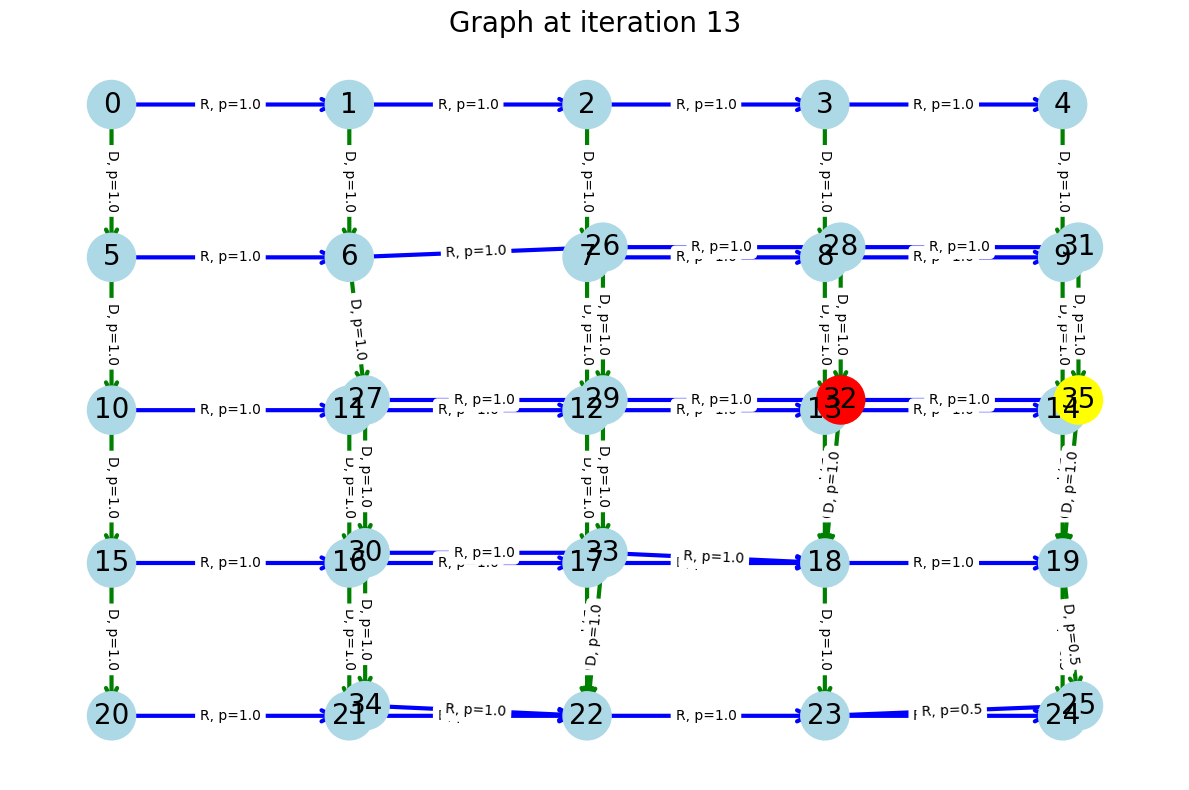

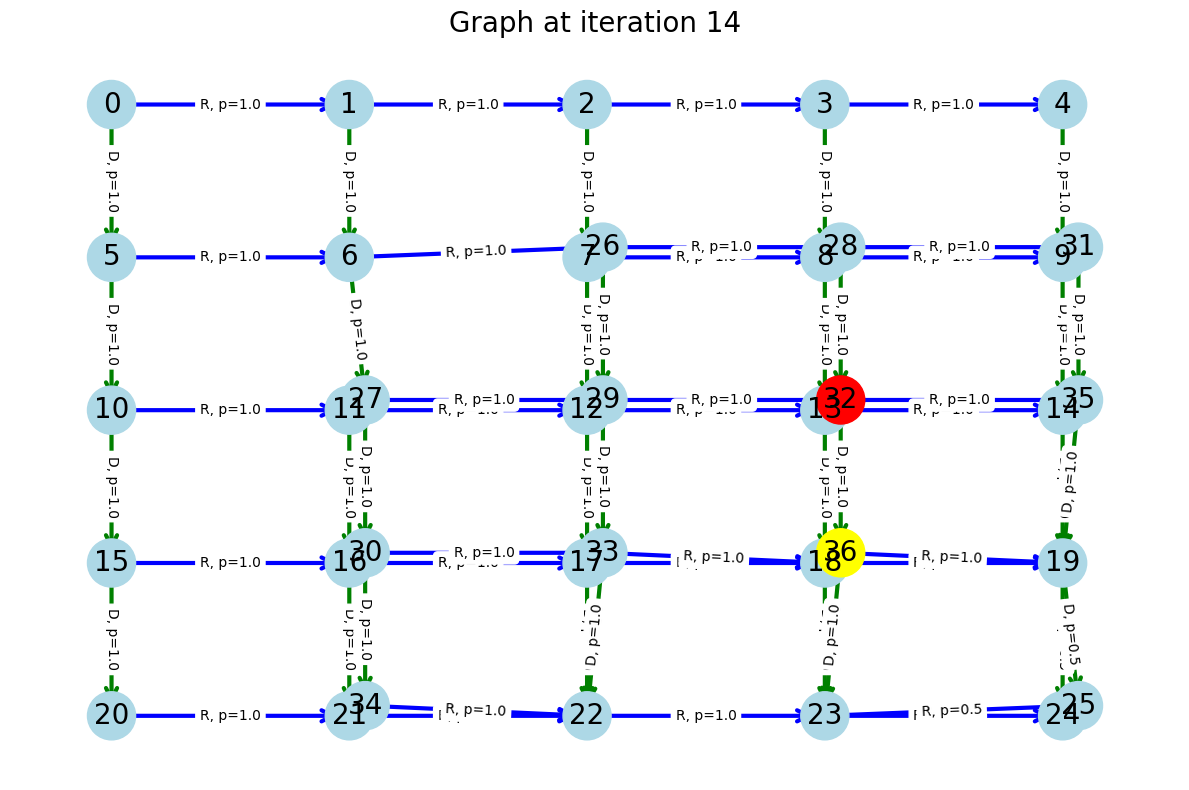



Iteration 8


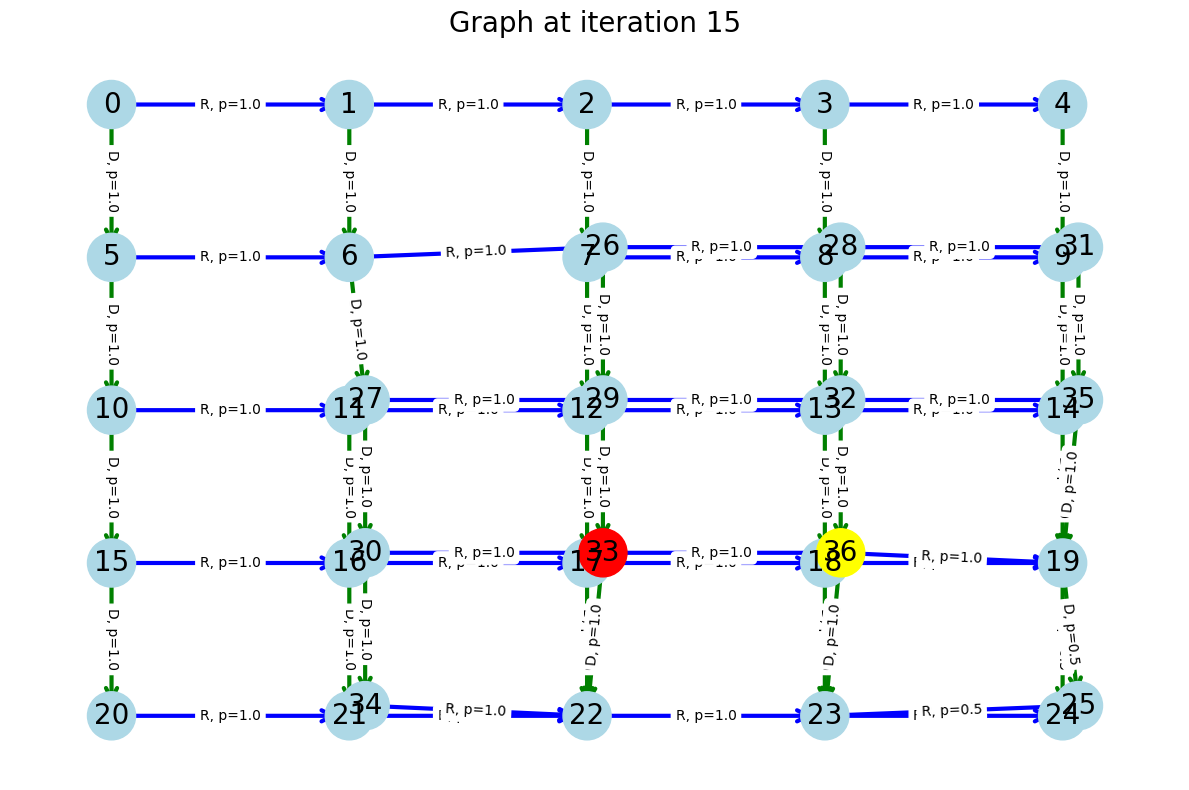

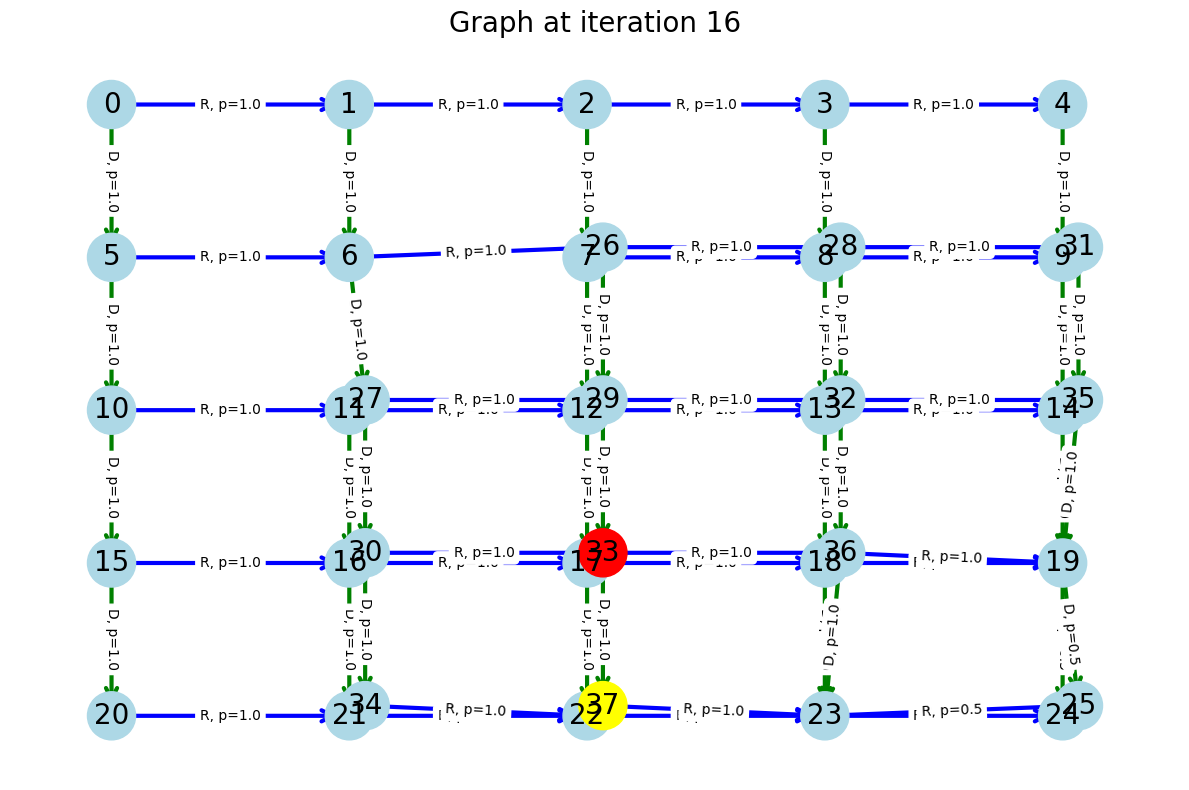



Iteration 9


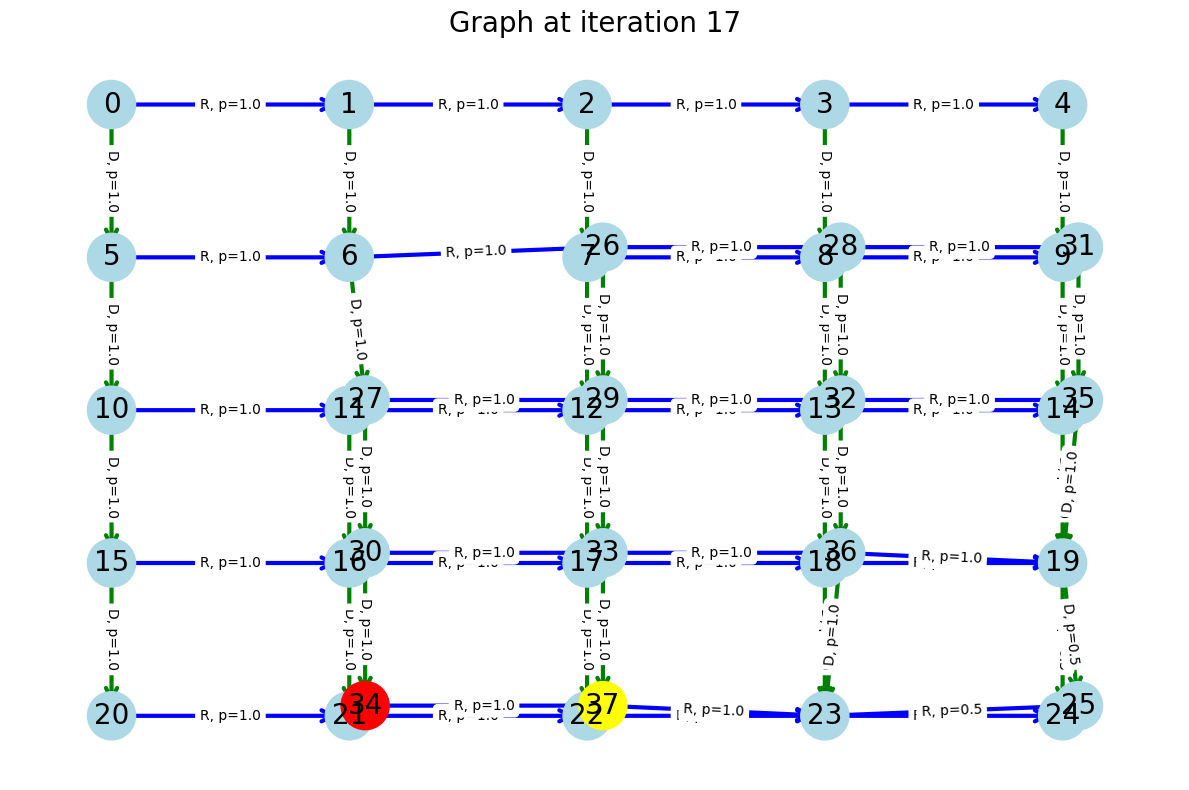



Iteration 10


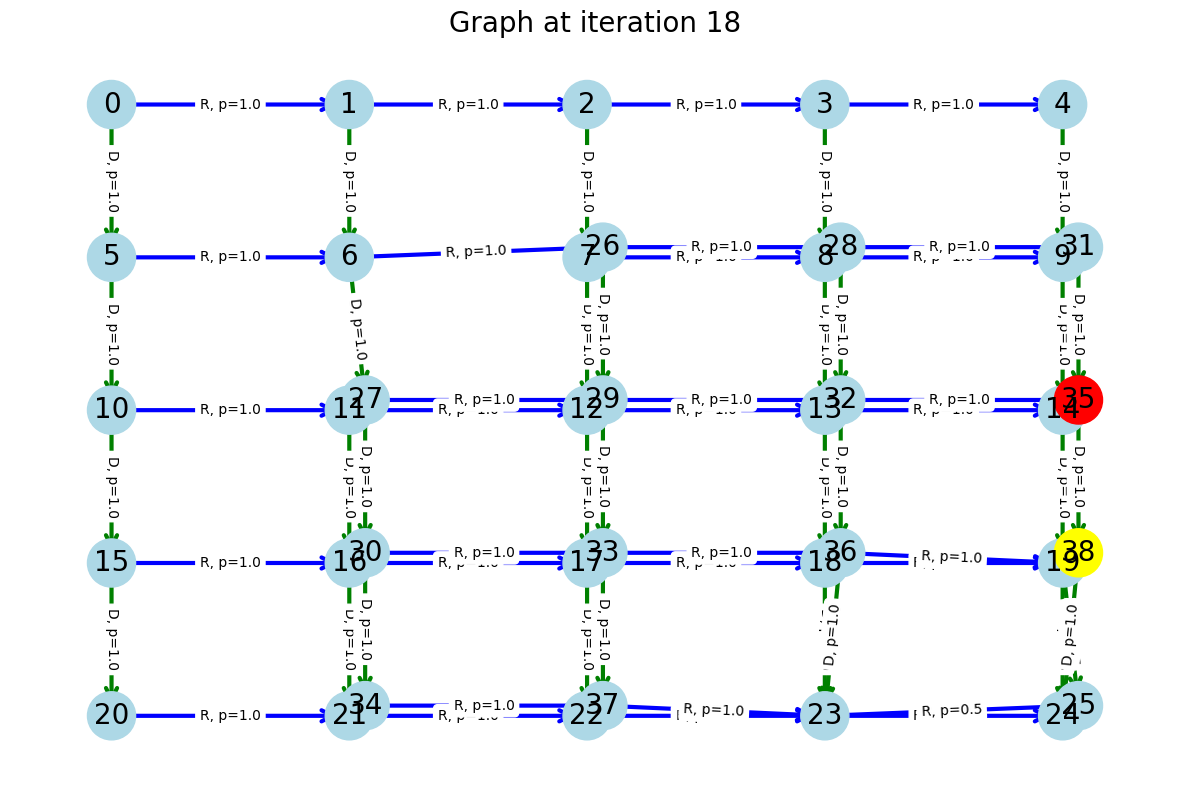



Iteration 11


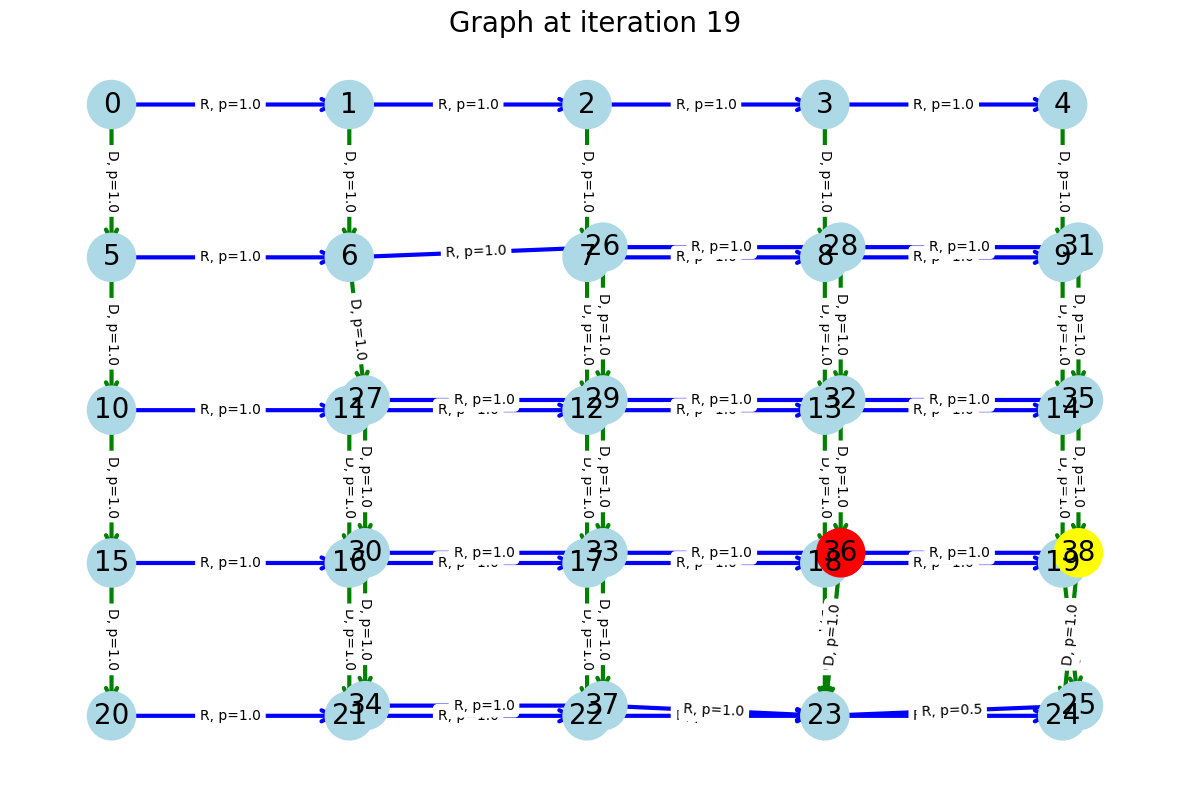

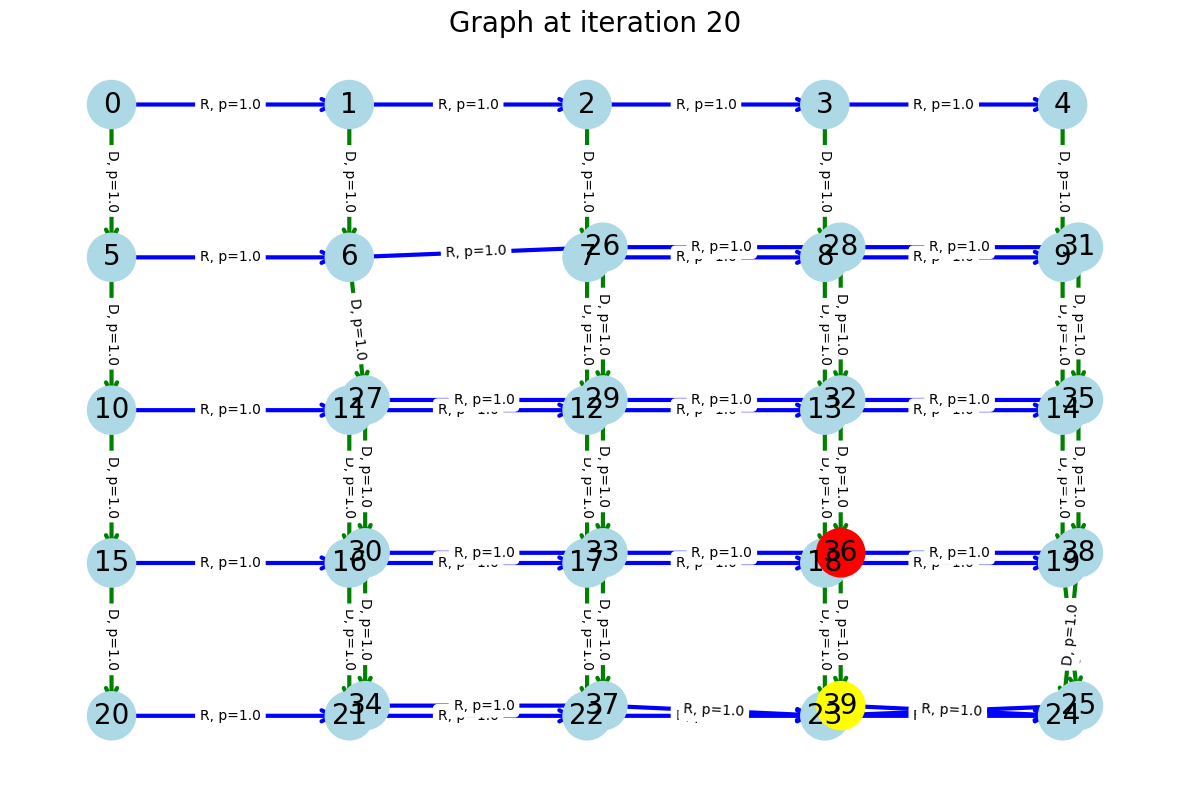



Iteration 12


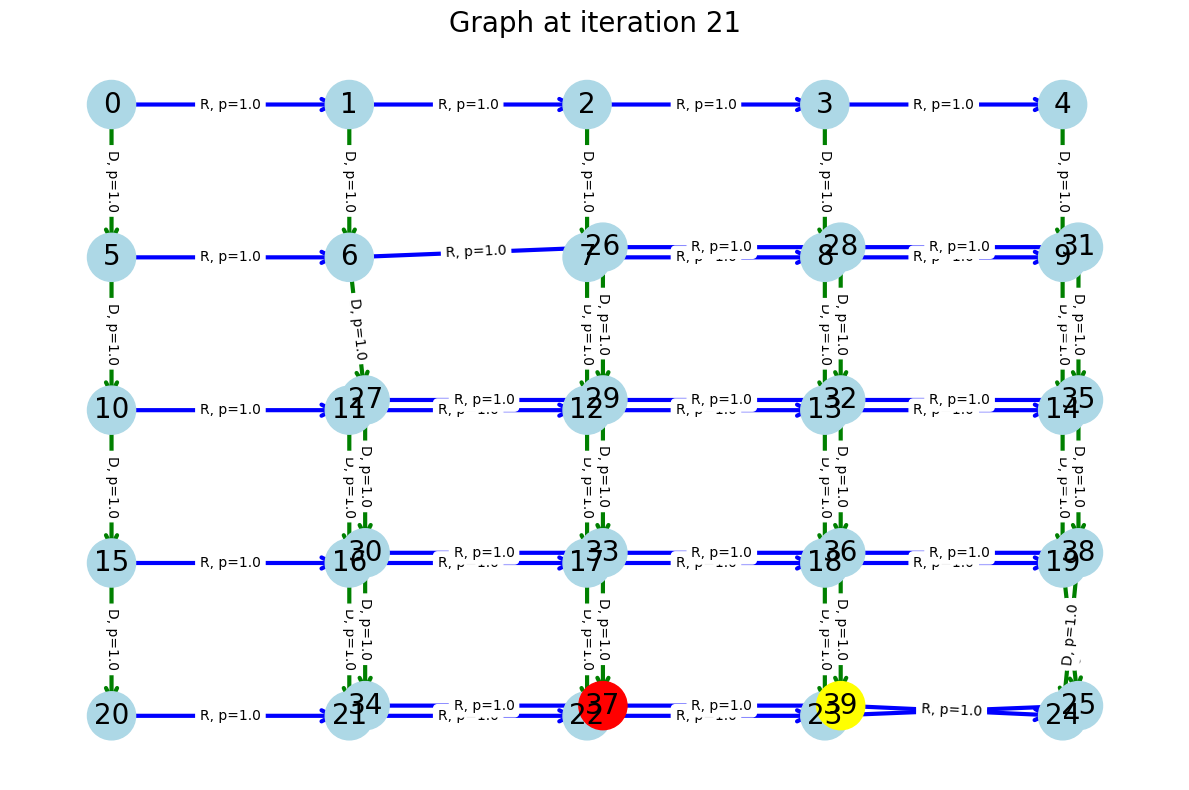



Iteration 13
Finished splitting at iteration 13


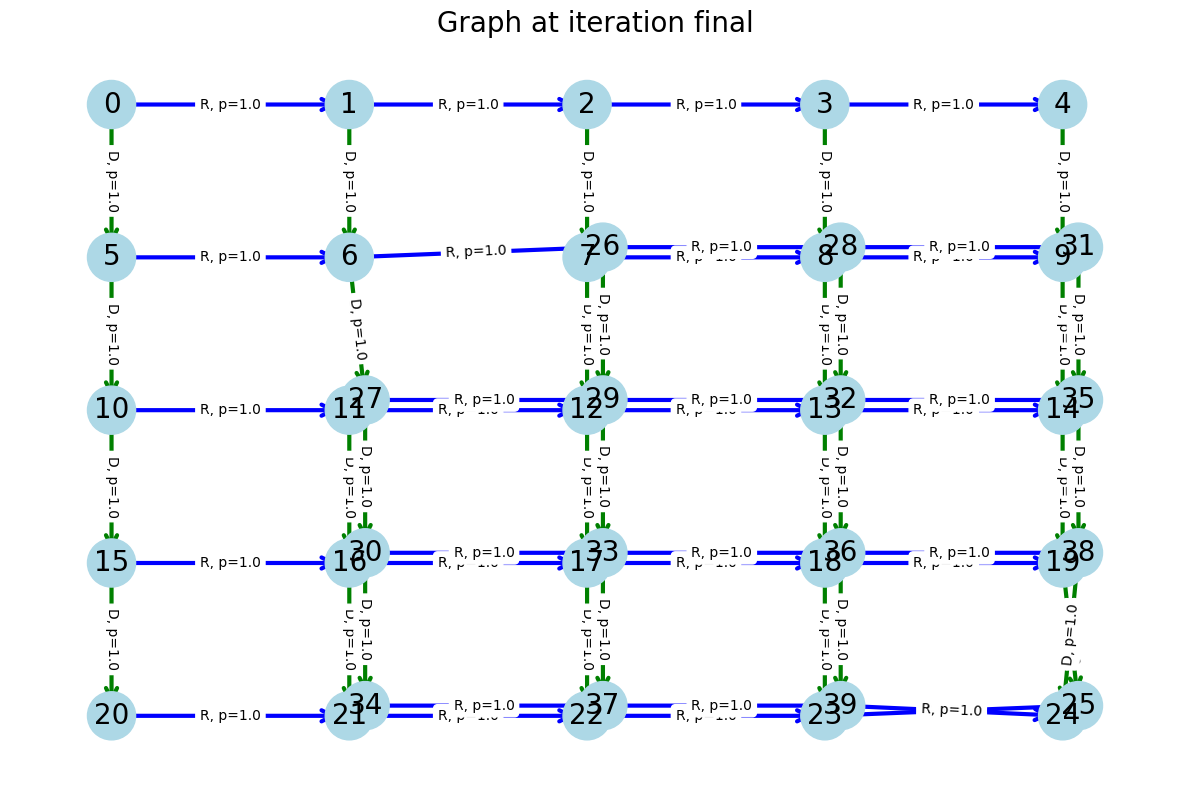

In [5]:
for i in range(100):
    print(np.random.binomial(n=1, p=1))

# 1. Degradation

In [4]:
# coding: 1 = A, 4 = B, 2 = R, 3 = nR, 0 = delay
observation_1 = [1,0,2] # start 1, left turn, rewarded
observation_2 = [1,0,3] # start 1, left turn, rewarded
observation_3 = [4,0,3] # start 2, right turn, rewarded
observation_4 = [0,2] # start 1, right turn, no reward
observation_5 = [0,3] # start 2, left turn, no reward
# 2: left turn, 4: right turn, 5: reward, 6: no reward
actions_1 = [0,0]
actions_2 = [0,0]
actions_3 = [0,0]
actions_4 = [0]
actions_5 = [0]

a = 1
b = 4
r = 2
nr = 3
d = 0

super_observations = (([observation_1] * 30) +
                     ([observation_2] * 10) +
                     ([observation_3] * 20) +
                     ([observation_4] * 30) + 
                     ([observation_5] * 10))
# and similarly for actions:
super_actions =( ([actions_1] * 30) +
                ([actions_2] * 10) +
                ([actions_3] * 20) +
                ([actions_4] * 30) +
                ([actions_5] * 10))

combined = list(zip(super_observations, super_actions))
random.shuffle(combined)
super_observations, super_actions = zip(*combined)  # unzip

dataset=[]
for l in range(len(super_observations)):
    dataset.append([super_observations[l], super_actions[l]])



transition_counts = transition_matrix_action(dataset)
denominators = transition_counts.sum(axis=2, keepdims=True)
denominators[denominators == 0] = 1
transition_probs = transition_counts / denominators
# denominators.shape
actions = [0]
iterations=20
used_cues = []
# clone_map = []
clone_dict = {}
reverse_clone_dict = {}
graphiter = 0
savename='tmaze'
# plot_graph_nogrid(transition_probs,'initial',savename=savename)  
# Actual code
for i in range(iterations):
    print("Iteration {}".format(i))
    entropies = compute_transition_entropies(transition_probs)
    stochastic_pairs = find_stochastic_state_actions_by_entropy(entropies, eps=1e-9) # (s,a,sprime,sprime2)
    
    if stochastic_pairs: 
        cues = []
        for (s, a) in stochastic_pairs:
            print("Stochastic pairs: {}".format((s,a)))
            # if len(vali)
            # valid_actions = env.get_valid_actions(s)
            sprime, sprime2 = get_successor_states(transition_counts,s,a)
            cue = calculate_contingency_tmaze(dataset, s, sprime, sprime2)
            print(cue)
            cues.append(cue)
            
        # split out the successor states
        unique_cues = np.unique([x for sublist in cues for x in sublist])
        print(unique_cues)
        split = False
        
        for cue in unique_cues:
            if cue in used_cues: 
                continue
            if split == True: 
                continue
            if cue > 6:
                print("Current cue: {} (clone of {})".format(cue, clone_dict[cue]))
            else:
                print("Current cue: {}".format(cue))
            
            # if cue not in used_cues:
            split=True # just split one at a time
            # valid actions
            # valid_actions = env.get_valid_actions(cue)
            # for a in valid_actions:  
            # if cue > 6: # cloned state, so need to get the valid actions from the original state
            #     valid_actions = env.get_valid_actions(clone_dict[cue])
            # else:
            #     valid_actions = env.get_valid_actions(cue)
            # clone_orig = clone_dict[]
            for a in actions:
                # print(cue,a)
                if get_successor_states(transition_counts,cue,a).size>0:
                    successor = get_successor_states(transition_counts,cue,a)[0] # suppose 7
                    # if reverse_clone_dict[successor]: # this has been created before
                    if successor in reverse_clone_dict:
                        existing_clone = reverse_clone_dict[successor]
                        for d, seq in enumerate(dataset):
                            states_seq = seq[0]
                            if has_state(states_seq, successor): # get all the sequence that has 7
                                if has_transition(cue, successor,states_seq): # this is sequence that 6->7, clone 7
                                    # 1. modify dataset

                                    dataset[d][0] = [existing_clone if x==successor else x for x in dataset[d][0]] 

                    else:    # hasn't been created before. split        
                        # split this as a function of whether it came from cue (6) vs. others
                        # has_state(sequence,)
                        n_unique_states = len(get_unique_states(dataset))
                        new_clone = n_unique_states + 1            
                        
                        # clone_map.append((successor,new_clone))
                        clone_dict[new_clone] = successor
                        reverse_clone_dict[successor] = new_clone
                        for d, seq in enumerate(dataset):
                            states_seq = seq[0]
                            if has_state(states_seq, successor): # get all the sequence that has 7
                                if has_transition(cue, successor,states_seq): # this is sequence that 6->7, clone 7
                                    # 1. modify dataset

                                    dataset[d][0] = [new_clone if x==successor else x for x in dataset[d][0]] 
                    # 2. modify transition count
                    transition_counts = transition_matrix_action(dataset)
                    denominators = transition_counts.sum(axis=2, keepdims=True)
                    denominators[denominators == 0] = 1
                    transition_probs = transition_counts / denominators
                    # graphiter = 0
                    # plot_graph_nogrid(transition_probs,graphiter, cue, new_clone,savename=savename)
                    graphiter+=1
            used_cues.append(cue)
    
        print('\n')
    else:
        print('Finished splitting at iteration {}'.format(i))
        break        
# plot_graph_nogrid(transition_probs,'final', savename=savename)    

Iteration 0
Stochastic pairs: (0, 0)
[2]
[2]
Current cue: 2


Iteration 1
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 2
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 3
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 4
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 5
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 6
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 7
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 8
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 9
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 10
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 11
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 12
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 13
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 14
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 15
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 16
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 17
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 18
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 19
Stochastic pairs: (0, 0)
[2]
[2]




In [5]:
a = 1
b = 4
r = 2
nr = 3
d = 0

In [6]:
E_r, E_nr = conditioned_eligibility_traces(dataset, r, nr, lam=lam, gamma=gamma)

In [7]:
print(E_r, '\n', E_nr)

[[43.2   15.552 60.     0.     0.   ]] 
 [[28.8    5.184  0.    40.    10.368]]


In [8]:
E_r[E_r==0] = 1e-3
# E_nr[E_nr==0] = 1e-3
E_c = E_r / (E_r + E_nr )    
E_c


array([[6.00000000e-01, 7.50000000e-01, 1.00000000e+00, 2.49993750e-05,
        9.64413155e-05]])

<Axes: >

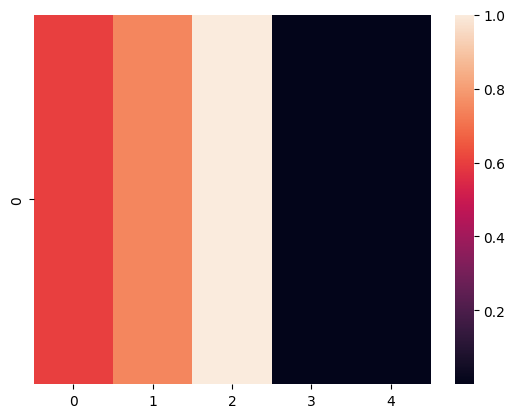

In [9]:
sns.heatmap(E_c)

# 2. Cued Reward

In [10]:
# coding: 1 = A, 4 = B, 2 = R, 3 = nR, 0 = delay
observation_1 = [1,0,2] # start 1, left turn, rewarded
observation_2 = [1,0,3] # start 1, left turn, rewarded
observation_3 = [4,0,3] # start 2, right turn, rewarded
observation_4 = [5,0,2] # start 1, right turn, no reward
observation_5 = [5,0,3] # start 2, left turn, no reward
# 2: left turn, 4: right turn, 5: reward, 6: no reward
actions_1 = [0,0]
actions_2 = [0,0]
actions_3 = [0,0]
actions_4 = [0,0]
actions_5 = [0,0]

a = 1
b = 4
r = 2
nr = 3
d = 0
c = 5

super_observations = (([observation_1] * 30) +
                     ([observation_2] * 10) +
                     ([observation_3] * 20) +
                     ([observation_4] * 30) + 
                     ([observation_5] * 10))
# and similarly for actions:
super_actions =( ([actions_1] * 30) +
                ([actions_2] * 10) +
                ([actions_3] * 20) +
                ([actions_4] * 30) +
                ([actions_5] * 10))

combined = list(zip(super_observations, super_actions))
random.shuffle(combined)
super_observations, super_actions = zip(*combined)  # unzip

dataset=[]
for l in range(len(super_observations)):
    dataset.append([super_observations[l], super_actions[l]])



transition_counts = transition_matrix_action(dataset)
denominators = transition_counts.sum(axis=2, keepdims=True)
denominators[denominators == 0] = 1
transition_probs = transition_counts / denominators
# denominators.shape
actions = [0]
iterations=20
used_cues = []
# clone_map = []
clone_dict = {}
reverse_clone_dict = {}
graphiter = 0
savename='tmaze'
# plot_graph_nogrid(transition_probs,'initial',savename=savename)  
# Actual code
for i in range(iterations):
    print("Iteration {}".format(i))
    entropies = compute_transition_entropies(transition_probs)
    stochastic_pairs = find_stochastic_state_actions_by_entropy(entropies, eps=1e-9) # (s,a,sprime,sprime2)
    
    if stochastic_pairs: 
        cues = []
        for (s, a) in stochastic_pairs:
            print("Stochastic pairs: {}".format((s,a)))
            # if len(vali)
            # valid_actions = env.get_valid_actions(s)
            sprime, sprime2 = get_successor_states(transition_counts,s,a)
            cue = calculate_contingency_tmaze(dataset, s, sprime, sprime2)
            print(cue)
            cues.append(cue)
            
        # split out the successor states
        unique_cues = np.unique([x for sublist in cues for x in sublist])
        print(unique_cues)
        split = False
        
        for cue in unique_cues:
            if cue in used_cues: 
                continue
            if split == True: 
                continue
            if cue > 6:
                print("Current cue: {} (clone of {})".format(cue, clone_dict[cue]))
            else:
                print("Current cue: {}".format(cue))
            
            # if cue not in used_cues:
            split=True # just split one at a time
            # valid actions
            # valid_actions = env.get_valid_actions(cue)
            # for a in valid_actions:  
            # if cue > 6: # cloned state, so need to get the valid actions from the original state
            #     valid_actions = env.get_valid_actions(clone_dict[cue])
            # else:
            #     valid_actions = env.get_valid_actions(cue)
            # clone_orig = clone_dict[]
            for a in actions:
                # print(cue,a)
                if get_successor_states(transition_counts,cue,a).size>0:
                    successor = get_successor_states(transition_counts,cue,a)[0] # suppose 7
                    # if reverse_clone_dict[successor]: # this has been created before
                    if successor in reverse_clone_dict:
                        existing_clone = reverse_clone_dict[successor]
                        for d, seq in enumerate(dataset):
                            states_seq = seq[0]
                            if has_state(states_seq, successor): # get all the sequence that has 7
                                if has_transition(cue, successor,states_seq): # this is sequence that 6->7, clone 7
                                    # 1. modify dataset

                                    dataset[d][0] = [existing_clone if x==successor else x for x in dataset[d][0]] 

                    else:    # hasn't been created before. split        
                        # split this as a function of whether it came from cue (6) vs. others
                        # has_state(sequence,)
                        n_unique_states = len(get_unique_states(dataset))
                        new_clone = n_unique_states + 1            
                        
                        # clone_map.append((successor,new_clone))
                        clone_dict[new_clone] = successor
                        reverse_clone_dict[successor] = new_clone
                        for d, seq in enumerate(dataset):
                            states_seq = seq[0]
                            if has_state(states_seq, successor): # get all the sequence that has 7
                                if has_transition(cue, successor,states_seq): # this is sequence that 6->7, clone 7
                                    # 1. modify dataset

                                    dataset[d][0] = [new_clone if x==successor else x for x in dataset[d][0]] 
                    # 2. modify transition count
                    transition_counts = transition_matrix_action(dataset)
                    denominators = transition_counts.sum(axis=2, keepdims=True)
                    denominators[denominators == 0] = 1
                    transition_probs = transition_counts / denominators
                    # graphiter = 0
                    # plot_graph_nogrid(transition_probs,graphiter, cue, new_clone,savename=savename)
                    graphiter+=1
            used_cues.append(cue)
    
        print('\n')
    else:
        print('Finished splitting at iteration {}'.format(i))
        break        
# plot_graph_nogrid(transition_probs,'final', savename=savename)    

Iteration 0
Stochastic pairs: (0, 0)
[2]
[2]
Current cue: 2


Iteration 1
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 2
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 3
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 4
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 5
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 6
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 7
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 8
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 9
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 10
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 11
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 12
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 13
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 14
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 15
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 16
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 17
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 18
Stochastic pairs: (0, 0)
[2]
[2]


Iteration 19
Stochastic pairs: (0, 0)
[2]
[2]




In [11]:
E_r, E_nr = conditioned_eligibility_traces(dataset, r, nr, lam=lam, gamma=gamma)
print(E_r, '\n', E_nr)

[[43.2   15.552 60.     0.     0.    15.552]] 
 [[28.8    5.184  0.    40.    10.368  5.184]]


<Axes: >

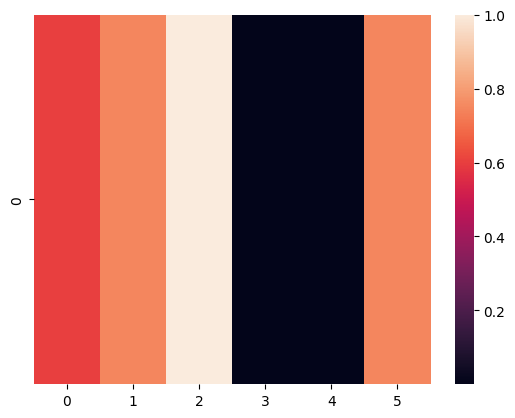

In [12]:
E_r[E_r==0] = 1e-3
# E_nr[E_nr==0] = 1e-3
E_c = E_r / (E_r + E_nr )    
E_c
sns.heatmap(E_c)

# Latent Inhibition

reward
reward
reward
reward
reward
reward
reward
reward
reward
reward
reward
reward
[[0, 1, 2, 5, np.int64(9)], [np.int64(0), np.int64(0), np.int64(1), np.int64(1)]]
[[0, 3, 4, 5, np.int64(9)], [np.int64(1), np.int64(0), np.int64(0), np.int64(1)]]
[[0, 3, 4, 5, np.int64(9)], [np.int64(1), np.int64(0), np.int64(0), np.int64(1)]]
[[0, 3, 6, 7, np.int64(9)], [np.int64(1), np.int64(1), np.int64(0), np.int64(0)]]
[[0, 3, 4, 7, np.int64(9)], [np.int64(1), np.int64(0), np.int64(1), np.int64(0)]]
[[0, 1, 2, 5, np.int64(9)], [np.int64(0), np.int64(0), np.int64(1), np.int64(1)]]
[[0, 1, 2, 5, np.int64(9)], [np.int64(0), np.int64(0), np.int64(1), np.int64(1)]]
[[0, 3, 4, 5, np.int64(9)], [np.int64(1), np.int64(0), np.int64(0), np.int64(1)]]
[[0, 1, 2, 5, np.int64(9)], [np.int64(0), np.int64(0), np.int64(1), np.int64(1)]]
[[0, 1, 2, 5, np.int64(9)], [np.int64(0), np.int64(0), np.int64(1), np.int64(1)]]
[[0, 1, 2, 5, np.int64(9)], [np.int64(0), np.int64(0), np.int64(1), np.int64(1)]]
[[0, 3, 4, 7, 

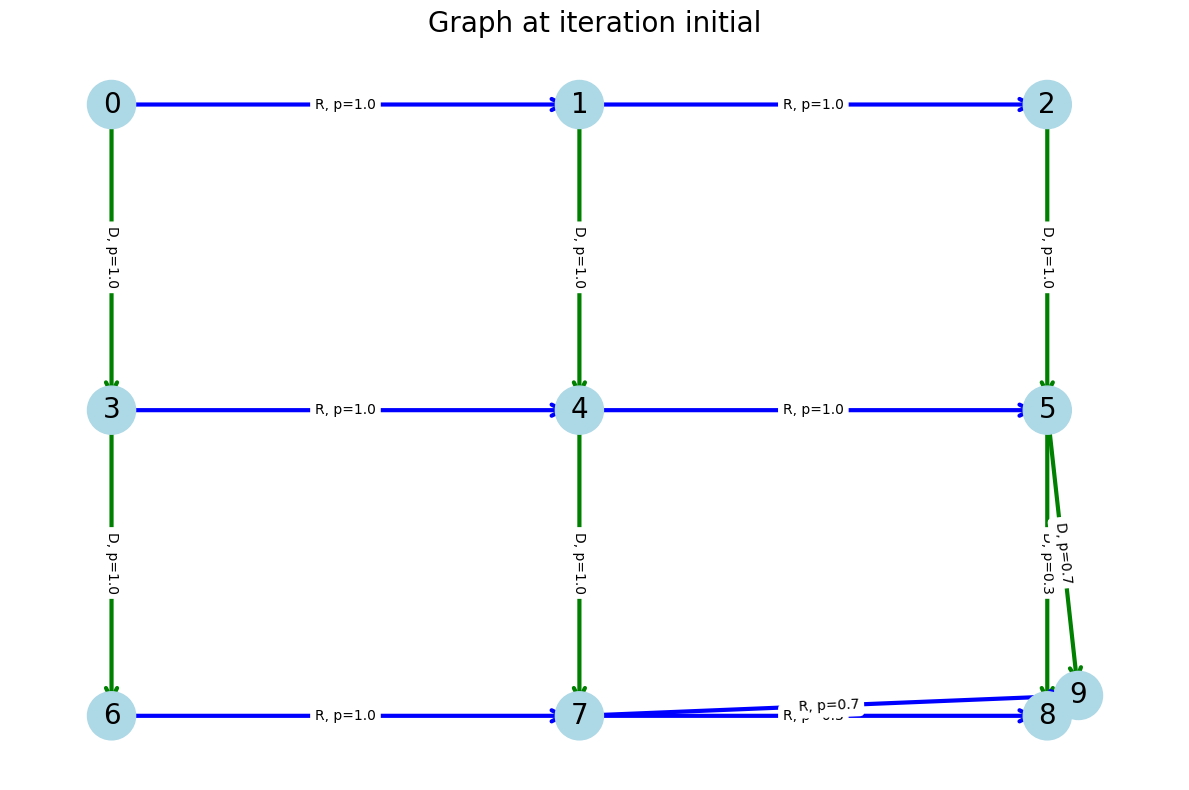

Iteration 0


Iteration 1


Iteration 2


Iteration 3


Iteration 4


Iteration 5


Iteration 6


Iteration 7


Iteration 8


Iteration 9


Iteration 10


Iteration 11


Iteration 12


Iteration 13


Iteration 14


Iteration 15


Iteration 16


Iteration 17


Iteration 18


Iteration 19


Iteration 20


Iteration 21


Iteration 22


Iteration 23


Iteration 24


Iteration 25


Iteration 26


Iteration 27


Iteration 28


Iteration 29


Iteration 30


Iteration 31


Iteration 32


Iteration 33


Iteration 34


Iteration 35


Iteration 36


Iteration 37


Iteration 38


Iteration 39


Iteration 40


Iteration 41


Iteration 42


Iteration 43


Iteration 44


Iteration 45


Iteration 46


Iteration 47


Iteration 48


Iteration 49


Iteration 50


Iteration 51


Iteration 52


Iteration 53


Iteration 54


Iteration 55


Iteration 56


Iteration 57


Iteration 58


Iteration 59


Iteration 60


Iteration 61


Iteration 62


Iteration 63


Iteration 64


Iteration 65


Iteration 66


Itera

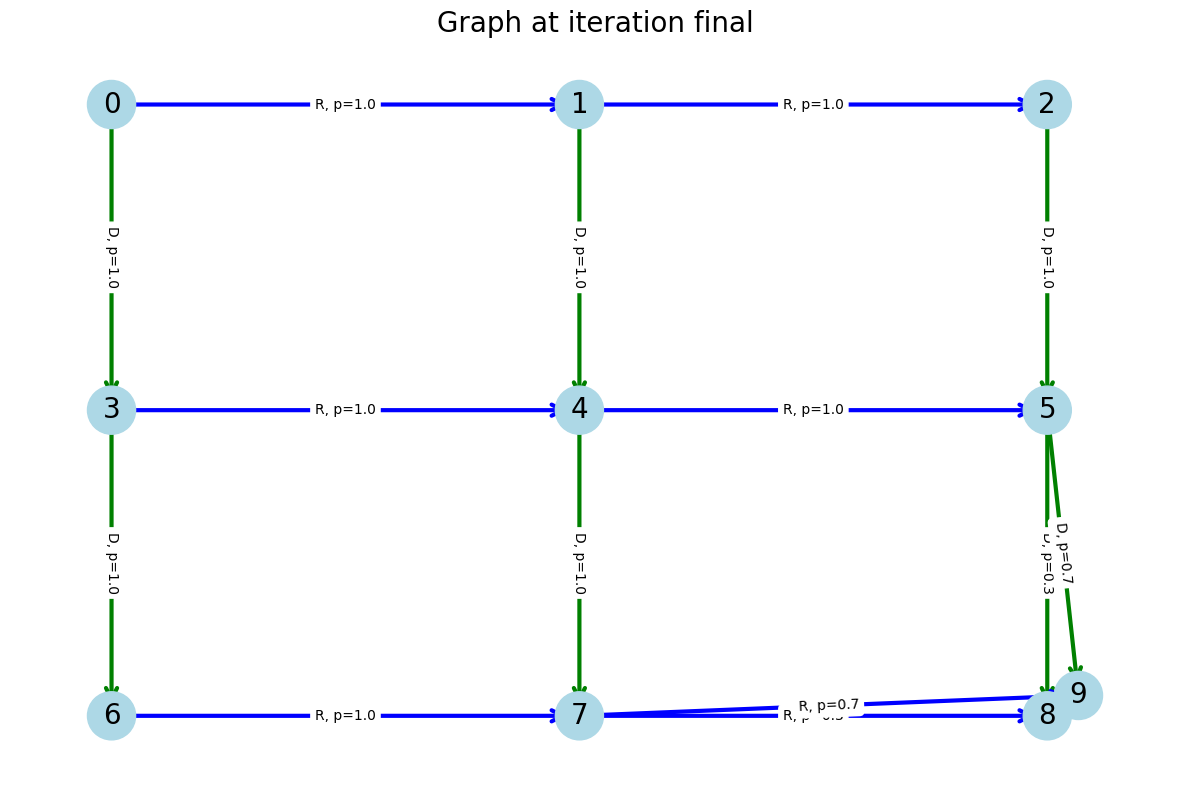

In [7]:
# Dataset
size = 3
env_size = (size,size)
rewarded_terminal = env_size[0]*env_size[1]-1
cue_states = [4]
env = GridLatentInhibition(env_size=env_size, 
                             rewarded_terminal = [rewarded_terminal],
                             cue_states=cue_states)

max_steps_per_episode = 100

dataset = generate_inhibition_dataset(env, n_episodes=36)

for walk in dataset:
    print(walk)


transition_counts = transition_matrix_action(dataset)
denominators = transition_counts.sum(axis=2, keepdims=True)
denominators[denominators == 0] = 1
transition_probs = transition_counts / denominators
# denominators.shape
actions = [0,1]
iterations=100
used_cues = []
graphiter = 0
savename='cued'
env.plot_graph(transition_probs,'initial',savename=savename)  

for i in range(iterations):
    print("Iteration {}".format(i))

    entropies = compute_transition_entropies(transition_probs)
    stochastic_pairs = find_stochastic_state_actions_by_entropy(entropies, eps=1e-9) # (s,a,sprime,sprime2)
    
    if stochastic_pairs: 
        cues = []
        for (s, a) in stochastic_pairs: # s is something like 15 (->16)
            # print("Stochastic pairs: {}".format((s,a)))
            sprime, sprime2 = get_successor_states(transition_counts,s,a) # this is something like 16, 17
            cue = calculate_contingency(dataset, sprime, sprime2, env_size)
            cues.append(cue)
            
        # split out the successor states
        unique_cues = np.unique([x for sublist in cues for x in sublist])
        split = False
        
        for cue in unique_cues:
            if cue in used_cues: 
                continue
            if split == True: 
                continue
            split=True # just split one at a time

            if cue > env.num_unique_states-1: #17: # cloned state, so need to get the valid actions from the original state
                valid_actions = env.get_valid_actions(env.clone_dict[cue])
            else:
                valid_actions = env.get_valid_actions(cue)
            for a in valid_actions:
                # print(cue,a)
                successor = get_successor_states(transition_counts,cue,a)[0] # suppose 7
                if successor in env.reverse_clone_dict: # this has been created before
                    existing_clone = env.reverse_clone_dict[successor]
                    for d, seq in enumerate(dataset):
                        states_seq = seq[0]
                        if has_state(states_seq, successor): # get all the sequence that has 7
                            if has_transition(cue, successor,states_seq): # this is sequence that 6->7, clone 7
                                # 1. modify dataset
                                dataset[d][0] = [existing_clone if x==successor else x for x in dataset[d][0]] 

                else:    # hasn't been created before. split        
                    # split this as a function of whether it came from cue (6) vs. others
                    # has_state(sequence,)
                    n_unique_states = len(get_unique_states(dataset))
                    new_clone = n_unique_states            
                    
                    # clone_map.append((successor,new_clone))
                    env.add_clone_dict(new_clone, successor)
                    # clone_dict[new_clone] = successor
                    env.add_reverse_clone_dict(new_clone, successor)
                    # reverse_clone_dict[successor] = new_clone
                    for d, seq in enumerate(dataset):
                        states_seq = seq[0]
                        if has_state(states_seq, successor): # get all the sequence that has 7
                            if has_transition(cue, successor,states_seq): # this is sequence that 6->7, clone 7
                                # 1. modify dataset

                                dataset[d][0] = [new_clone if x==successor else x for x in dataset[d][0]] 
                # 2. modify transition count
                transition_counts = transition_matrix_action(dataset)
                denominators = transition_counts.sum(axis=2, keepdims=True)
                denominators[denominators == 0] = 1
                transition_probs = transition_counts / denominators
                # graphiter = 0
                env.plot_graph(transition_probs,graphiter, cue, new_clone,savename=savename)
                graphiter+=1
            used_cues.append(cue)
    
        print('\n')
    else:
        print('Finished splitting at iteration {}'.format(i))
        break        
env.plot_graph(transition_probs,'final', savename=savename)    